In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

df = pd.read_csv("cyberbullying_tweets2.csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
...,...,...
11953,"If white, brown and black people can vote for Trump, I don’t put anything past them.",ethnicity
11954,Dumb nigger fuck always comes in my room uses my piano and plays one song @Rowellisous,ethnicity
11955,@slinkyslappa @chickentastey FUCK YOU dumb bitch. You'll never see nigger. How does that feel?,ethnicity
11956,"Racism makes you look dumb as fuck ""look at all these ugly niggers on my TL"" .....you have permission to kill yoself.",ethnicity


In [5]:
df = pd.read_csv('cyberbullying_tweets2.csv')
df['cyberbullying_type'].value_counts()

gender                 1999
religion               1999
ethnicity              1999
age                    1992
other_cyberbullying    1989
not_cyberbullying      1980
Name: cyberbullying_type, dtype: int64

In [6]:
df.shape

(11958, 2)

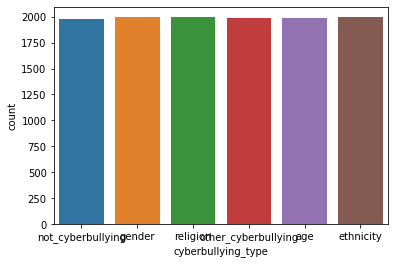

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.countplot(data = df, x = 'cyberbullying_type')

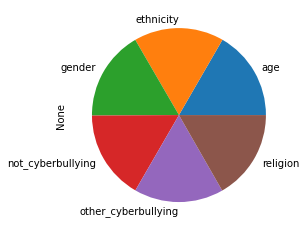

In [8]:
df.groupby('cyberbullying_type').size().plot(kind='pie')

In [9]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
stop_words = set(stopwords.words('english'))


In [12]:
from nltk.tokenize import word_tokenize

def data_processing(tweet_text):
    tweet_text = tweet_text.lower()
    tweet_text = re.sub(r'https\S+|www\S+http\S+', '', tweet_text, flags = re.MULTILINE)
    tweet_text = re.sub(r'\@w+|\#', '', tweet_text)
    tweet_text = re.sub(r'[^\w\s]', '', tweet_text)
    tweet_text = re.sub('[0-9]+', '', tweet_text)
    tweet_text_tokens = word_tokenize(tweet_text)
    filtered_tweet_text = [word for word in tweet_text_tokens if not word_tokenize in stop_words]
    return " ".join(filtered_tweet_text)

In [13]:
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
df.tweet_text = df['tweet_text'].apply(data_processing)
df = df.drop_duplicates('tweet_text')
df

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapilicious mkr,not_cyberbullying
1,why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc,not_cyberbullying
2,xochitlsuckkks a classy whore or more red velvet cupcakes,not_cyberbullying
3,jason_gio meh p thanks for the heads up but not too concerned about another angry dude on twitter,not_cyberbullying
4,rudhoeenglish this is an isis account pretending to be a kurdish account like islam it is all lies,not_cyberbullying
...,...,...
11953,if white brown and black people can vote for trump i dont put anything past them,ethnicity
11954,dumb nigger fuck always comes in my room uses my piano and plays one song rowellisous,ethnicity
11955,slinkyslappa chickentastey fuck you dumb bitch youll never see nigger how does that feel,ethnicity
11956,racism makes you look dumb as fuck look at all these ugly niggers on my tl you have permission to kill yoself,ethnicity


In [15]:
df.shape

(11823, 2)

In [16]:
df['cyberbullying_type'].value_counts()

religion               1995
ethnicity              1994
gender                 1992
age                    1988
not_cyberbullying      1979
other_cyberbullying    1875
Name: cyberbullying_type, dtype: int64

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

vec = TfidfVectorizer(ngram_range=(1,3)).fit(df['tweet_text'])

In [18]:
# Plotting top 20 words of each cyberbullying type
for cyber_type in df.cyberbullying_type.unique():
    
    top20_word = df.tweet_text[df.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:20]
    
    fig = px.bar(top20_word, color=top20_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top20_word.values])
    fig.update_traces(marker_color='blue')
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 20 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

In [19]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
df.cyberbullying_type = lenc.fit_transform(df.cyberbullying_type)
lenc.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [21]:
cyberbullying_types = ["religion","age","gender","ethnicity","not_cyberbullying", "other_cyberbullying"]

In [22]:
df.head(10)

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapilicious mkr,3
1,why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc,3
2,xochitlsuckkks a classy whore or more red velvet cupcakes,3
3,jason_gio meh p thanks for the heads up but not too concerned about another angry dude on twitter,3
4,rudhoeenglish this is an isis account pretending to be a kurdish account like islam it is all lies,3
5,rajaaab quickieleaks yes the test of god is that good or bad or indifferent or weird or whatever it all proves gods existence,3
6,itu sekolah ya bukan tempat bully ga jauh kaya neraka,3
7,karma i hope it bites kat on the butt she is just nasty mkr,3
8,stockputout everything but mostly my priest,3
9,rebecca black drops out of school due to bullying,3


In [23]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [24]:
tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv =  clf.fit_transform(df['tweet_text'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [25]:
X_tf

<11823x26258 sparse matrix of type '<class 'numpy.float64'>'
	with 237972 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.model_selection import train_test_split
# 70/30 split
# train and test
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['cyberbullying_type'], test_size=0.30, stratify=df['cyberbullying_type'], random_state=42)

In [27]:
y_train.value_counts()

5    1396
1    1396
2    1394
0    1392
3    1385
4    1313
Name: cyberbullying_type, dtype: int64

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

MultinomialNB()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import classification_report
nb_pred = nb_clf.predict(X_test)
print('Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=cyberbullying_types))

Naive Bayes:
                      precision    recall  f1-score   support

           religion       0.56      0.99      0.71       596
                age       0.82      0.89      0.86       598
             gender       0.77      0.83      0.80       598
          ethnicity       0.72      0.29      0.41       594
  not_cyberbullying       0.73      0.18      0.29       562
other_cyberbullying       0.71      0.97      0.82       599

           accuracy                           0.70      3547
          macro avg       0.72      0.69      0.65      3547
       weighted avg       0.72      0.70      0.65      3547



In [32]:
knn_pred = knn_clf.predict(X_test)
print('KNearest Neighbor:\n',classification_report(y_test, knn_pred, target_names=cyberbullying_types))

KNearest Neighbor:
                      precision    recall  f1-score   support

           religion       0.68      0.89      0.77       596
                age       0.87      0.84      0.85       598
             gender       0.54      0.84      0.66       598
          ethnicity       0.43      0.54      0.48       594
  not_cyberbullying       0.58      0.17      0.26       562
other_cyberbullying       0.93      0.56      0.70       599

           accuracy                           0.64      3547
          macro avg       0.67      0.64      0.62      3547
       weighted avg       0.67      0.64      0.62      3547



In [33]:
rf_pred = rf_clf.predict(X_test)
print('Random Forest:\n',classification_report(y_test, rf_pred, target_names=cyberbullying_types))

Random Forest:
                      precision    recall  f1-score   support

           religion       0.94      0.98      0.96       596
                age       0.97      0.96      0.97       598
             gender       0.91      0.80      0.85       598
          ethnicity       0.54      0.58      0.56       594
  not_cyberbullying       0.57      0.58      0.58       562
other_cyberbullying       0.93      0.95      0.94       599

           accuracy                           0.81      3547
          macro avg       0.81      0.81      0.81      3547
       weighted avg       0.81      0.81      0.81      3547



In [34]:
from sklearn.model_selection import cross_val_score

NB_cv_score = cross_val_score(nb_clf,X_train, y_train, cv=3)
KNN_cv_score = cross_val_score(knn_clf,X_train, y_train, cv=3)
RF_cv_score = cross_val_score(rf_clf,X_train, y_train, cv=3)

print('Cross validation score (Multinomial Naive Bayes Classifier):', NB_cv_score.mean())
print('Cross validation score (K Nearest Neighbor):', KNN_cv_score.mean())
print('Cross validation score (Random Forest Classifier):', RF_cv_score.mean())

Cross validation score (Multinomial Naive Bayes Classifier): 0.6811249850293276
Cross validation score (K Nearest Neighbor): 0.6546674811062886
Cross validation score (Random Forest Classifier): 0.7994195365456563


In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [36]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
               metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                262590    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 262,601
Trainable params: 262,601
Non-trainable params: 0
_________________________________________________________________


In [40]:
X_train = X_train.toarray()
history = model.fit(X_train, y_train, epochs=100, batch_size=25)

Epoch 1/100
332/332 [==============================] - 6s 17ms/step - loss: -1.4525 - accuracy: 0.1684
Epoch 2/100
332/332 [==============================] - 3s 9ms/step - loss: -9.3468 - accuracy: 0.1692
Epoch 3/100
332/332 [==============================] - 3s 9ms/step - loss: -23.5166 - accuracy: 0.1701
Epoch 4/100
332/332 [==============================] - 3s 10ms/step - loss: -44.0369 - accuracy: 0.1709
Epoch 5/100
332/332 [==============================] - 3s 9ms/step - loss: -70.1812 - accuracy: 0.1717
Epoch 6/100
332/332 [==============================] - 3s 9ms/step - loss: -101.4004 - accuracy: 0.1718
Epoch 7/100
332/332 [==============================] - 3s 10ms/step - loss: -137.2211 - accuracy: 0.1719
Epoch 8/100
332/332 [==============================] - 3s 9ms/step - loss: -177.2749 - accuracy: 0.1718
Epoch 9/100
332/332 [==============================] - 3s 9ms/step - loss: -221.5213 - accuracy: 0.1718
Epoch 10/100
332/332 [==============================] - 3s 9ms/step 

In [41]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 332}

In [42]:
history.history

{'loss': [-1.4524527788162231,
  -9.346845626831055,
  -23.51661491394043,
  -44.03694534301758,
  -70.18116760253906,
  -101.40044403076172,
  -137.22113037109375,
  -177.27488708496094,
  -221.52133178710938,
  -269.7251281738281,
  -321.40716552734375,
  -376.9082336425781,
  -435.61077880859375,
  -497.2760314941406,
  -561.8641357421875,
  -629.5255737304688,
  -700.6123657226562,
  -774.9957275390625,
  -852.9266967773438,
  -933.630615234375,
  -1017.9724731445312,
  -1105.369384765625,
  -1195.7596435546875,
  -1289.2606201171875,
  -1386.0355224609375,
  -1486.24169921875,
  -1589.4390869140625,
  -1695.4296875,
  -1803.9256591796875,
  -1915.4339599609375,
  -2030.3450927734375,
  -2148.445556640625,
  -2269.57177734375,
  -2393.47607421875,
  -2520.257080078125,
  -2650.44189453125,
  -2782.405517578125,
  -2918.026611328125,
  -3056.61865234375,
  -3198.072509765625,
  -3343.412353515625,
  -3491.166259765625,
  -3642.385986328125,
  -3795.03173828125,
  -3951.02099609375,


In [43]:
y_hat = model.predict(X_test)
y_hat = [0 if val <0.5 else 1 for val in y_hat]

111/111 [==============================] - 0s 2ms/step


In [44]:
accuracy_score(y_test, y_hat)

0.17141246123484635